# 1.0 Treinamento do Joaquim: DS Novato

In [10]:
import pandas as pd
import numpy as np
from sklearn import tree as tr
from sklearn import metrics as mt
from sklearn import datasets as ds
from matplotlib import pyplot as plt
from sklearn import model_selection as ms

## Dados sintéticos

In [2]:
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

# dataset
X, y = ds.make_classification(
                        n_samples= n_samples,
                        n_features= n_features,
                        n_informative= n_informative,
                        n_redundant= n_redundant,
                        random_state=n_samples
)
# production dataset
X, X_prod, y, y_prod =  ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

## Não há separação dos dados

In [3]:
# define model
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(X, y)

# classification sobre os dados de treinamento
yhat = model.predict(X)

acc = mt.accuracy_score(y, yhat)

print( f'Accuracy Over Training: {acc}')

Accuracy Over Training: 1.0


## Publicação do Modelo em Produção

In [4]:
yhat_prod = model.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print( f'Accuracy Over Production: {acc_prod}')

Accuracy Over Production: 0.931


## Estratégia Treino-Teste

In [5]:
# Separa os dados em Treinamento e Teste
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

In [6]:
# Modelo treinado com os dados de treinamento
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(X_train, y_train)

# classificação sobre os dados de teste
yhat_test = model.predict(X_test)

acc_test = mt.accuracy_score(y_test, yhat_test)

print(f'Accuracy Over Test {acc_test}')

Accuracy Over Test 0.930625


# Escolha de parâmetros do algoritmo

## Modelo treinado e validado com o dataset de Treinamento


In [7]:
values = [i for i in range( 1, 60 )]
test_scores = list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth=i )
    model.fit( X_train, y_train )
    # Previsão sobre os dados de test
    yhat_test = model.predict( X_test )
    acc_test = mt.accuracy_score( y_test, yhat_test )
    test_scores.append( acc_test )  

## plot of train and test scores vs tree depth

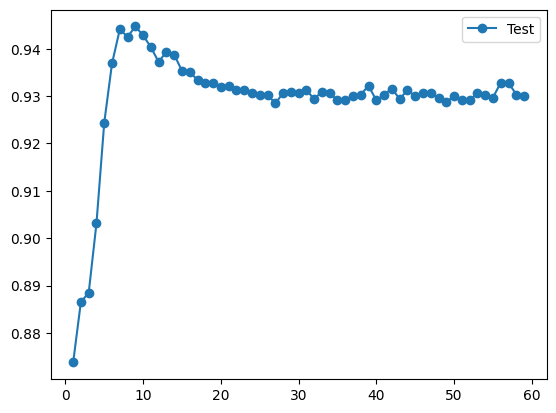

In [8]:
plt.plot( values, test_scores, '-o', label='Test' )
plt.legend()
plt.show()

# Publicação do Modelo em Produção

## Modelo treinado e validado com o dataset de Treinamento

In [11]:
model_last = tr.DecisionTreeClassifier( max_depth=7 )
model_last.fit( np.concatenate( (X_train, X_test) ), np.concatenate((y_train, y_test)) )
model_last.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=7)

## Previsão sobre os dados de produção

In [12]:
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production: {}".format( acc_prod ) )

Accuracy Over Production: 0.946


# 3.0 Estratégia Treino-Validation-Teste

## Separação entre Treino e Teste

In [13]:
X_train, X_val, y_train, y_val = ms.train_test_split( X_train, y_train, test_size=0.2, random_state=random_state )

## Modelo treinado e validado com o dataset de Treinamento

In [14]:
values = [i for i in range( 1, 60 )]
val_scores = list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth=i )
    model.fit( X_train, y_train )
    # Previsão sobre os dados de treinamento
    yhat_val = model.predict( X_val )
    acc_val = mt.accuracy_score( y_val, yhat_val )
    val_scores.append( acc_val )

## plot of train and test scores vs tree depth

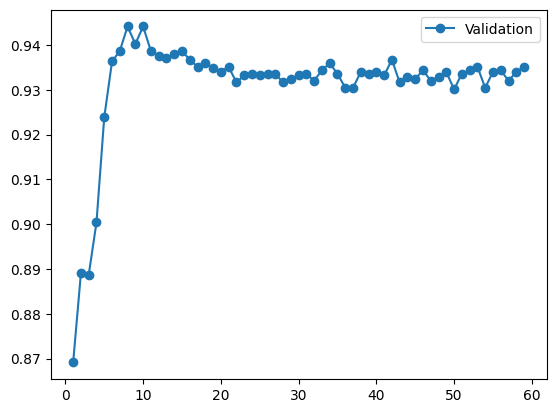

In [15]:
plt.plot( values, val_scores, '-o', label='Validation' )
plt.legend()
plt.show()

## Previsão sobre os dados de validacao

In [16]:
yhat_val = model.predict( X_val )
acc_val = mt.accuracy_score( y_val, yhat_val )
print( "Accuracy Over Validation: {}".format( acc_val ) )

Accuracy Over Validation: 0.93515625


## Modelo treinado e validado com o dataset de Treinamento

In [36]:
model_last = tr.DecisionTreeClassifier( max_depth=7 )
model_last.fit( np.concatenate( (X_train, X_val) ), np.concatenate((y_train, y_val)) )

DecisionTreeClassifier(max_depth=7)

## Previsão sobre os dados de test

In [37]:
yhat_test = model_last.predict( X_test )
acc_test = mt.accuracy_score( y_test, yhat_test )
print( "Accuracy Over Test: {}".format( acc_test ) )

Accuracy Over Test: 0.9440625


# Previsão sobre os dados de treinamento

In [38]:
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production: {}".format( acc_prod ) )

Accuracy Over Production: 0.94625
